In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/fish-market") # 데이터셋 다운로드 경로

print("Path to dataset files:", path) # 데이터 셋 경로 출력

Path to dataset files: C:\Users\유대민\.cache\kagglehub\datasets\vipullrathod\fish-market\versions\1


물류센터의 도미 35마리 저울로 잰 도미의 길이(cm), 무게(g)를 파이썬 리스트로 만듬

In [7]:
# 도미 35마리의 길이(cm), 무게(g)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

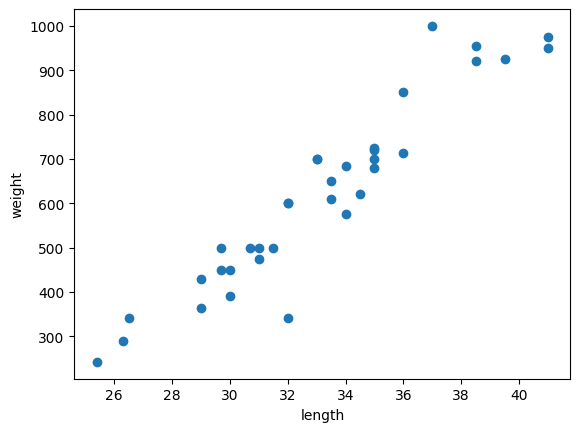

In [8]:
import matplotlib.pyplot as plt # as는 패키지 이름 줄여서 쓰는 것으로 as (원하는 패키지 이름) 이렇게 쓰면됨

plt.scatter(bream_length, bream_weight) # 산점도를 그리는 함수 scatter 사용
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show() # 보기 


물류 센터에는 빙어가 많지 않아 준비된 빙어는 14마리!

In [9]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

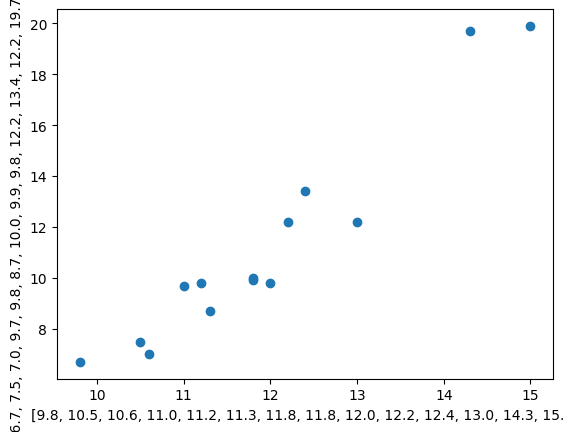

In [10]:
import matplotlib.pyplot as plt # matplotlib 맷플롯립 as로 plt로 부르게 하기!
# pyplot은 matplotlib(=맷플롯립)안에서 실제 그래프 그리는 세트(모듈)을 불러옴
plt.scatter(smelt_length, smelt_weight)
plt.xlabel(smelt_length)
plt.ylabel(smelt_weight)
plt.show() # 보기 

도미, 빙어 2개 scatter() - 산점도 / 함수로 나타내기 맷플롯랩이 친절하게 2개 이상이면 색깔로 구분해서 나타내줌

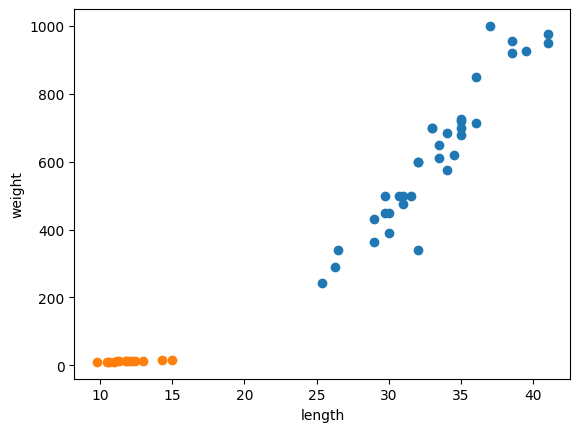

In [11]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_length)
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 보기 

KNN 최근접 이웃 알고리즘 (KNN Nearest Neighbors)을 사용해 도미와 빙어 데이터 구분

In [12]:
# 두 개 데이터 합침 
length = bream_length + smelt_length
weight = bream_length + smelt_length

In [13]:
fish_data = [[l,w] for l, w in zip(length, weight)]

단계별로 보면

zip(length, weight)
→ 두 리스트를 묶어서 (l, w) 형태의 튜플로 만들어 줌

예를 들어
length = [10, 20, 30]
weight = [100, 200, 300]
list(zip(length, weight))
-> [(10, 100), (20, 200), (30, 300)]


for l, w in zip(length, weight)
→ 묶인 각각의 (l, w) 쌍을 순서대로 꺼내옴

[l, w] for ...
→ 각 쌍을 다시 리스트 [길이, 무게] 형태로 변환해서 새로운 리스트로 만듭니다.

결과적으로
fish_data = [[10, 100], [20, 200], [30, 300]]


In [14]:
print(fish_data)

[[25.4, 25.4], [26.3, 26.3], [26.5, 26.5], [29.0, 29.0], [29.0, 29.0], [29.7, 29.7], [29.7, 29.7], [30.0, 30.0], [30.0, 30.0], [30.7, 30.7], [31.0, 31.0], [31.0, 31.0], [31.5, 31.5], [32.0, 32.0], [32.0, 32.0], [32.0, 32.0], [33.0, 33.0], [33.0, 33.0], [33.5, 33.5], [33.5, 33.5], [34.0, 34.0], [34.0, 34.0], [34.5, 34.5], [35.0, 35.0], [35.0, 35.0], [35.0, 35.0], [35.0, 35.0], [36.0, 36.0], [36.0, 36.0], [37.0, 37.0], [38.5, 38.5], [38.5, 38.5], [39.5, 39.5], [41.0, 41.0], [41.0, 41.0], [9.8, 9.8], [10.5, 10.5], [10.6, 10.6], [11.0, 11.0], [11.2, 11.2], [11.3, 11.3], [11.8, 11.8], [11.8, 11.8], [12.0, 12.0], [12.2, 12.2], [12.4, 12.4], [13.0, 13.0], [14.3, 14.3], [15.0, 15.0]]


In [15]:
fish_target = [1] * 35 + [0] * 14 # 곱셈 연산자를 이용해 파이썬 리스트를 간단하게 반복 시킴
print(fish_target) 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


머신러닝에서 2개를 구분하는 이진 분류의 경우 찾으려는 대상 1, 그 이외의 대상 0으로 두면 됨
여기서는 도미를 찾는 대상으로 두어서 1로 두고 빙어를 0
반대가 되면 빙어가 1하고 도미가 0하면 됨
여기 이진분류에서 1을 양성 클래스(positive class), 0을 음성 클래스(negative class)라고 부름

In [16]:
from sklearn.neighbors import KNeighborsClassifier 
# 사이킷런 패키지에서 K-최근접 이웃 알고리즘을 구현한 클래스 KNeighborsClassifier 임포트
# 파이썬에서 패키지나 모듈 전체를 임포트하지 않고 특정 클래스만 임포트 하려면 from ~ import 구문 사용 -> 다음과 같이 클래스 이름을 길게 사용하지 않아도됨
# import sklearn
# model = sklearn.neighbors.KNeighborsClassifier() -> 이런식으로 안길어져도됨

In [17]:
# 임포트한 KNeighborsClassifier 클래스의 객체를 먼저 만듬
kn = KNeighborsClassifier()

In [18]:
kn.fit(fish_data, fish_target) # fit() 메서드는 주어진 데이터로 알고리즘을 훈련함
# fish_data는 입력데이터 = 피처 데이터, fish_target은 정답 데이터

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
# 사이킷런에서 모델 평가하는 메서드는 score() 메서드
# socre() 메서드는 0에서 1사이의 값을 반환
# 1은 모든 데이터를 정확히 맞혔다는 것을 나타냄
# 0.5면 절반만 맞췄다는 것!

kn.score(fish_data, fish_target)

1.0

KNN Nearest Neighbors Algorithm : KNN 최근접 이웃 알고리즘
어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용
근묵자흑과 같이 주위의 데이터로 현재 데이터를 보고 판단함
 

In [20]:
kn.predict([[30, 600]])
# predict() 메서드(함수)는 새로운 데이터의 정답을 예측함
# 이 메서드도 앞서 fit() 메서드와 마찬가지로 리스트의 리스트를 전달해야해 원하는 포인트를 리스트로 2번 감쌌음

array([1])

K-Nearest Neighbors Algorithm : K-최근접 이웃 알고리즘을 준비하기 위해선 데이터를 가지고 있는게 전부
새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면됨

단점이 이런 특징 때문에 데이터가 아주 많은 경우 사용하기 어려움.. 데이터가 크면 메모리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간이 필요해서 그럼
-> 사이킷런의 KNeighborsClassifier 클래스도 마찬가지임
이 _fit_X에 fish_data를 모두 가지고있고 _y에 fish_target을 가지고 있음

In [21]:
print(kn._fit_X)

[[25.4 25.4]
 [26.3 26.3]
 [26.5 26.5]
 [29.  29. ]
 [29.  29. ]
 [29.7 29.7]
 [29.7 29.7]
 [30.  30. ]
 [30.  30. ]
 [30.7 30.7]
 [31.  31. ]
 [31.  31. ]
 [31.5 31.5]
 [32.  32. ]
 [32.  32. ]
 [32.  32. ]
 [33.  33. ]
 [33.  33. ]
 [33.5 33.5]
 [33.5 33.5]
 [34.  34. ]
 [34.  34. ]
 [34.5 34.5]
 [35.  35. ]
 [35.  35. ]
 [35.  35. ]
 [35.  35. ]
 [36.  36. ]
 [36.  36. ]
 [37.  37. ]
 [38.5 38.5]
 [38.5 38.5]
 [39.5 39.5]
 [41.  41. ]
 [41.  41. ]
 [ 9.8  9.8]
 [10.5 10.5]
 [10.6 10.6]
 [11.  11. ]
 [11.2 11.2]
 [11.3 11.3]
 [11.8 11.8]
 [11.8 11.8]
 [12.  12. ]
 [12.2 12.2]
 [12.4 12.4]
 [13.  13. ]
 [14.3 14.3]
 [15.  15. ]]


In [22]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


실제로 K-Nearest Neighbors Algorithm은 무언가 훈련되는게 없는셈.. fit() 메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고해 생선을 구분

실제로 가까운 몇개의 데이터를 참고할까? -> 정하기 나름
KNeighborsClassifier 클래스의 기본값은 5
이 기준은 n_neighbors 매개변수로 바꿀 수 있음

In [23]:
kn49 = KNeighborsClassifier(n_neighbors=49)
# 참고 데이터를 49개로 한 kn49 모델
"""
가장 가까운 데이터 49개를 사용하는 k-최근접 이웃 모델에 fish_data를 적용시
fish_data에 있는 모든 생선을 사용해 예측하게 됨
다시 말해 fish_data의 데이터가 49개 중에 도미가 35개로 다수를 차지해
어떤 데이터를 넣어도 무조건 도미로 예측할 것
"""


'\n가장 가까운 데이터 49개를 사용하는 k-최근접 이웃 모델에 fish_data를 적용시\nfish_data에 있는 모든 생선을 사용해 예측하게 됨\n다시 말해 fish_data의 데이터가 49개 중에 도미가 35개로 다수를 차지해\n어떤 데이터를 넣어도 무조건 도미로 예측할 것\n'

In [24]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [25]:
# fish_data 중 생선 도미가 35개이고 빙어가 14개 kn49 모델은 도미만 올바르게 맞혀 아래처럼 정확도 계산시 score() 메서드 같은 값 얻음
print(35/49)

0.7142857142857143


결론 = n_neighbors 매개변수를 49로 두는 것은 좋지 않음 기본값 5로 해 도미를 완벽하게 분류한 모델 사용할것임

In [30]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
        # KNN - Nearest Neighbors Algorithm 이웃 개수 설정
        kn.n_neighbors = n
        # 점수 계산
        score = kn.score(fish_data, fish_target)
        # 100% 정확도에 미치지 못하는 이웃 개수 출력
        if score < 1 :
            print(n, score)
            break

29 0.7142857142857143
